In [110]:
#Impoting Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [143]:
df=pd.read_csv("C:/Users/Rahul Gupta/Documents/Dataset/Diamonds.csv")

In [144]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [7]:
df.shape

(53940, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [11]:
df.describe(include='O')

cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat'>

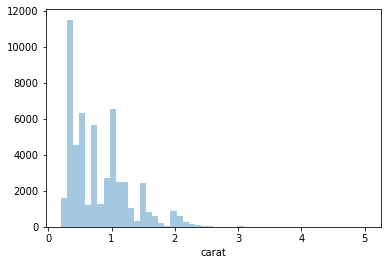

In [145]:
sns.distplot(df['carat'],kde=False)

* The underlying distribution of carat is highly irregular and positively skewed.

<AxesSubplot:xlabel='carat'>

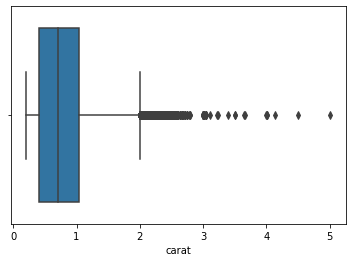

In [146]:
sns.boxplot(x=df['carat'])

* There are outliers above carat value 2.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='depth'>

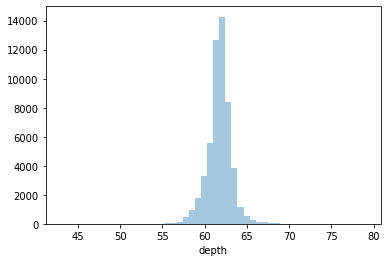

In [147]:
sns.distplot(df['depth'],kde=False)

* The underlying distribution of depth is approximately normal in the interval [55,70].

<AxesSubplot:xlabel='depth'>

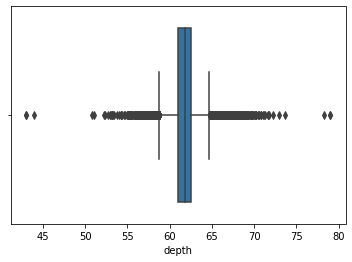

In [148]:
sns.boxplot(x=df['depth'])

* Large number of outliers which must be removed.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table'>

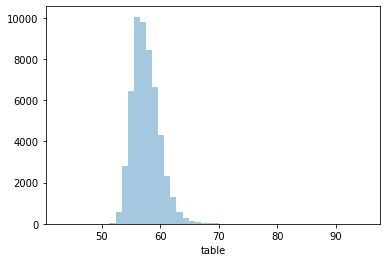

In [149]:
sns.distplot(df['table'],kde=False)

* The underlying distribution of table is very slight positively skewed.

<AxesSubplot:xlabel='table'>

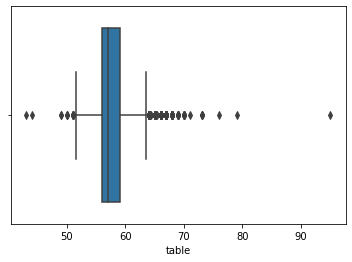

In [150]:
sns.boxplot(x=df['table'])

* There are outliers in table column.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

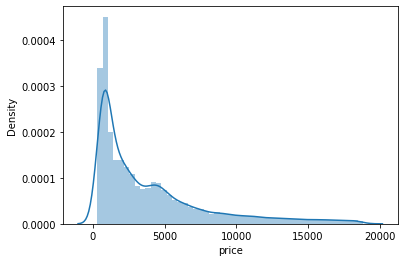

In [151]:
sns.distplot(df['price'])

* The distribution of price has very long right tail and the underlying distribution is positively skewed.

<AxesSubplot:xlabel='price'>

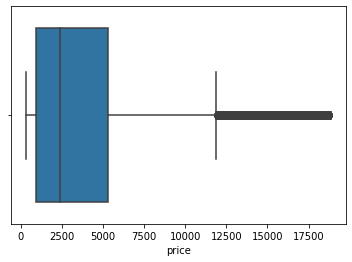

In [152]:
sns.boxplot(x=df['price'])

* There is large number of outliers which must be removed.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x'>

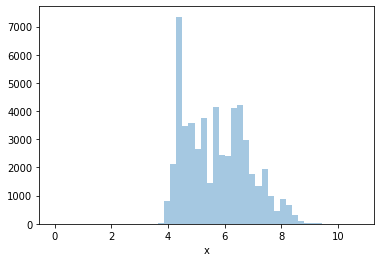

In [153]:
sns.distplot(df['x'],kde=False)

* The diamonds length is distributed in the interval 3.75mm to 8.75mm.

<AxesSubplot:xlabel='x'>

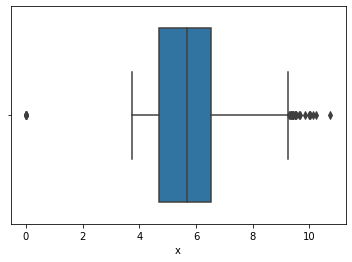

In [154]:
sns.boxplot(x=df['x'])

* There is a single outlier in the lower end and large number of outliers in upper end.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y'>

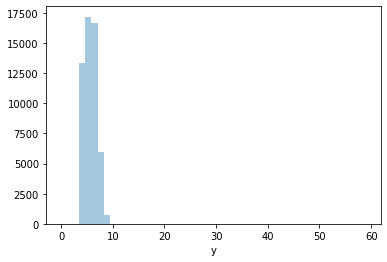

In [155]:
sns.distplot(df['y'],kde=False)

* The diamonds width is distributed in the interval 4mm to 9mm.

<AxesSubplot:xlabel='y'>

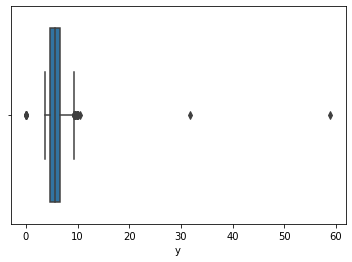

In [156]:
sns.boxplot(x=df['y'])

* There are outliers which highly effects the underlying distribution.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='z'>

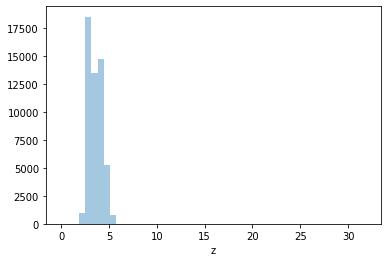

In [157]:
sns.distplot(df['z'],kde=False)

* The depth of diamonds are distributed in the interval 2mm to 6mm.

<AxesSubplot:xlabel='z'>

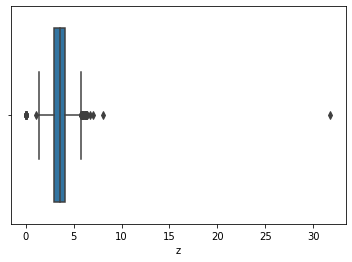

In [158]:
sns.boxplot(x=df['z'])

* There are outliers which highly effects the underlying distribution of depth.

In [159]:
pd.crosstab(index=df['cut'],columns='count')

col_0      count
cut             
Fair        1610
Good        4906
Ideal      21551
Premium    13791
Very Good  12082

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cut', ylabel='count'>

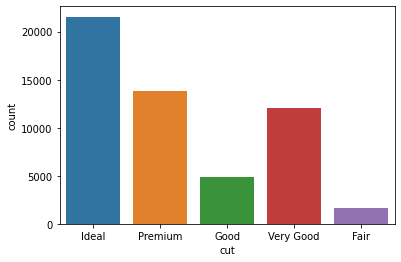

In [160]:
sns.countplot(df['cut'])

* Large proportion of diamonds have 'Ideal' cut followed by 'Premium' and very few diamonds have 'Fair' cut.

In [161]:
pd.crosstab(index=df['color'],columns='count')

col_0  count
color       
D       6775
E       9797
F       9542
G      11292
H       8304
I       5422
J       2808

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

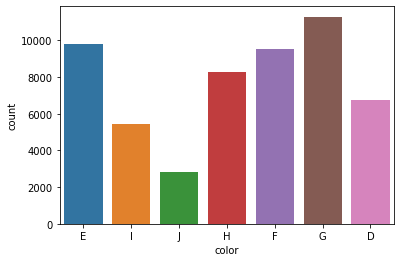

In [162]:
sns.countplot(df['color'])

* About 6200 diamonds have best color and around 2300 diamonds have worst color. 

In [163]:
pd.crosstab(index=df['clarity'],columns='count')

col_0    count
clarity       
I1         741
IF        1790
SI1      13065
SI2       9194
VS1       8171
VS2      12258
VVS1      3655
VVS2      5066

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='count'>

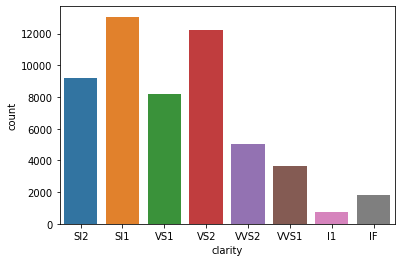

In [164]:
sns.countplot(df['clarity'])

* The proportion of best and worst diamonds is very less. But overall the poportion of diamonds with low clarity is high.

# Bivariate Analysis

In [165]:
correlation=df.corr()
correlation

carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000

<AxesSubplot:>

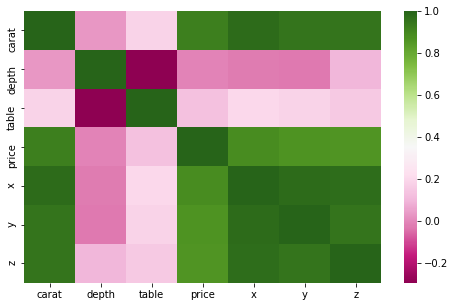

In [166]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation,fmt='.2f',cmap="PiYG")

<AxesSubplot:xlabel='cut', ylabel='price'>

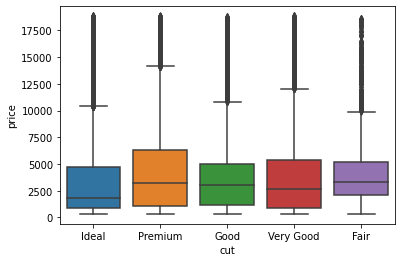

In [167]:
sns.boxplot(y='price',x='cut',data=df)

* Median price of diamonds with 'Premium'cut is maximum and it is minimum for 'Ideal' cut.

<AxesSubplot:xlabel='color', ylabel='price'>

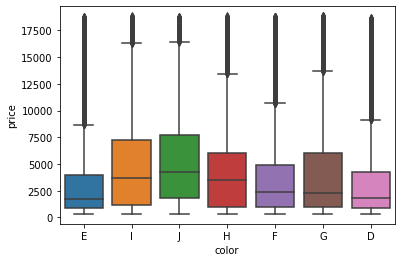

In [168]:
sns.boxplot(y='price',x='color',data=df)

* Median price of diamonds with worst color is maximum wheras it is minimum for diamonds with best color. As the  color of diamond deteriorates the median price increases. 

<AxesSubplot:xlabel='clarity', ylabel='price'>

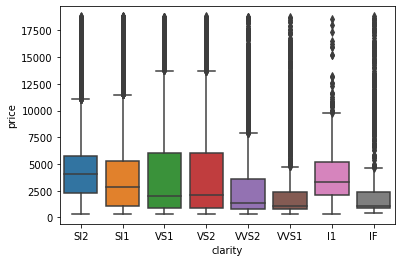

In [169]:
sns.boxplot(y='price',x='clarity',data=df)

* As the clarity of the diamond deteriorates median price increase.

<Figure size 2160x2160 with 0 Axes>

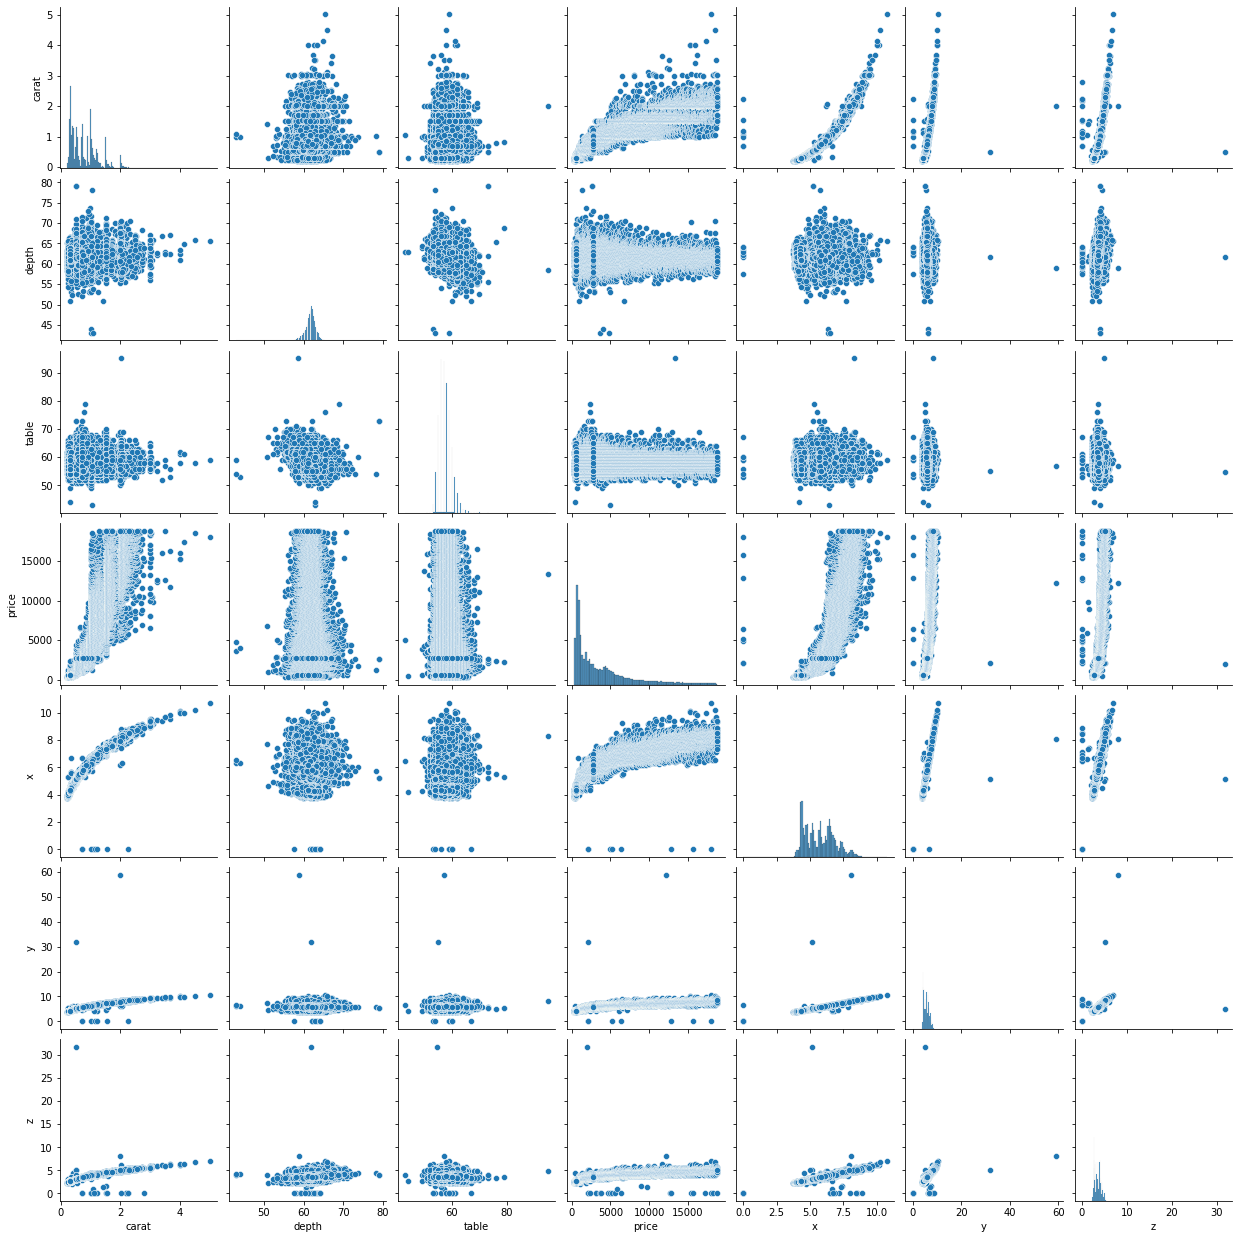

In [170]:
plt.figure(figsize=(30,30))
sns.pairplot(df)

<AxesSubplot:xlabel='color', ylabel='price'>

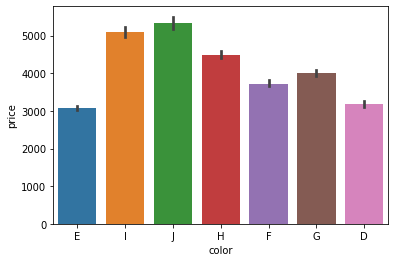

In [171]:
sns.barplot(x='color',y='price',data=df)

* Price of diamonds with worst color is maximum and as the color of the diamonds gets better, price decreases.

<AxesSubplot:xlabel='cut', ylabel='price'>

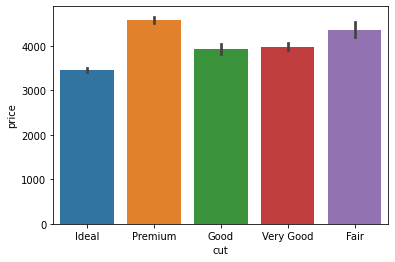

In [172]:
sns.barplot(x='cut',y='price',data=df)

* Price of premium cut diamonds is highest followed by fair cut and diamonds with ideal cut have minimum price.

<AxesSubplot:xlabel='clarity', ylabel='price'>

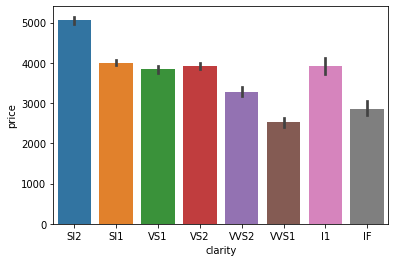

In [173]:
sns.barplot(x='clarity',y='price',data=df)

* Price of diamonds with better clarity is less than that with poor clarity.

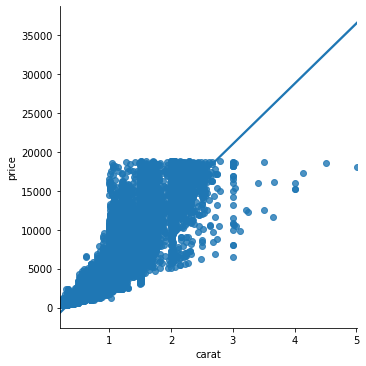

In [174]:
sns.lmplot(x='carat',y='price',data=df)

* Price of diamonds increases as carat increases. There is large number of diamonds with low carat but high price.

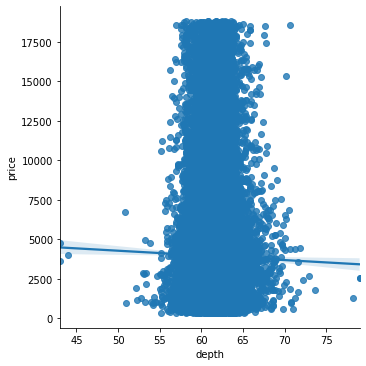

In [175]:
sns.lmplot(x='depth',y='price',data=df)

* There are large number of diamonds with same depth but there is large variation in their price.

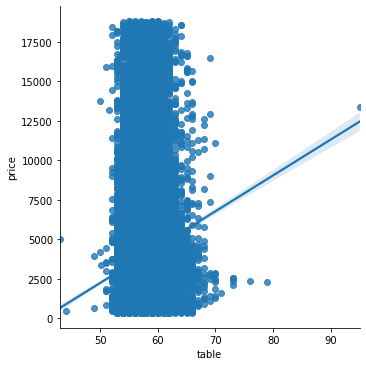

In [176]:
sns.lmplot(x='table',y='price',data=df)

* Table of diamonds usually lie in the interval 50 to 80 but there is high variation in their price.

(0.0, 21000.0)

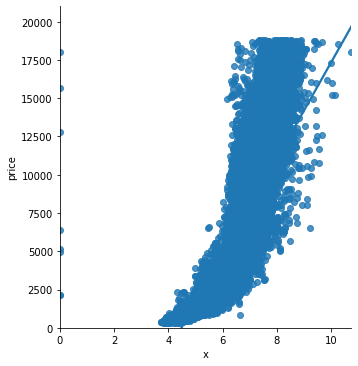

In [177]:
sns.lmplot(x='x',y='price',data=df)
plt.ylim(0,21000)

* There is a polynomial second degree relationship between price and length.

(0.0, 21000.0)

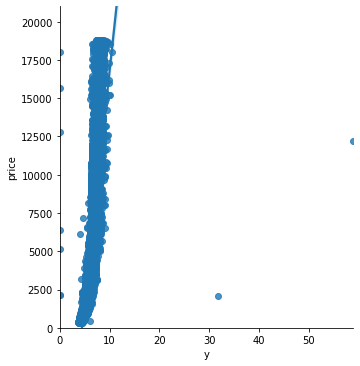

In [178]:
sns.lmplot(x='y',y='price',data=df)
plt.ylim(0,21000)

* In the range 0mm  to 12mm the regression line is very steep.

(0.0, 21000.0)

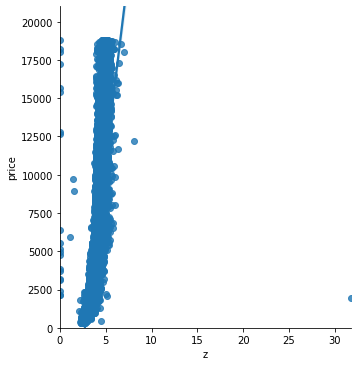

In [179]:
sns.lmplot(x='z',y='price',data=df)
plt.ylim(0,21000)

* In the range 0mm to 7mm the regression line is very steep.

# Data Imputation

In [16]:
#Lower and Upper Limits of Outliers Indentification
def lower_limit(x):
    return np.quantile(x,0.25)-1.5*(np.quantile(x,0.75)-np.quantile(x,0.25))

def upper_limit(x):
    return np.quantile(x,0.25)+1.5*(np.quantile(x,0.75)-np.quantile(x,0.25))

In [17]:
data=df[((df['carat']>=lower_limit(df['carat']))&(df['carat']<=upper_limit(df['carat'])))&((df['depth']>=lower_limit(df['depth']))&(df['depth']<=upper_limit(df['depth'])))&((df['table']>=lower_limit(df['table']))&(df['table']<=upper_limit(df['table'])))&((df['price']>=lower_limit(df['price']))&(df['price']<=upper_limit(df['price'])))&((df['x']>=lower_limit(df['x']))&(df['x']<=upper_limit(df['x'])))&((df['y']>=lower_limit(df['y']))&(df['y']<=upper_limit(df['y'])))&((df['z']>=lower_limit(df['z']))&(df['z']<=upper_limit(df['z'])))]

In [18]:
def mean_of_nonoutliers(x):
    y=[]
    for i in x:
        if (i>=lower_limit(x))&(i<=upper_limit(x)):
            y.append(i)
    return np.mean(y)

In [19]:
mean_of_nonoutliers(df['carat'])

0.6651025928195592

In [20]:
for i in range(df.shape[0]):
    if (df['carat'][i]<lower_limit(df['carat']))|(df['carat'][i]>upper_limit(df['carat'])):
        df['carat'][i]=0.66

<ipython-input-20-e5ff18f7a5cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['carat'][i]=0.66


In [21]:
mean_of_nonoutliers(df['depth'])

61.587530421416666

In [23]:
for i in range(df.shape[0]):
    if (df['depth'][i]<lower_limit(df['depth']))|(df['depth'][i]>upper_limit(df['depth'])):
        df['depth'][i]=61.59

<ipython-input-23-ec2924c9d3d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['depth'][i]=61.59


In [22]:
mean_of_nonoutliers(df['table'])

57.01138279245898

In [24]:
for i in range(df.shape[0]):
    if (df['table'][i]<lower_limit(df['table']))|(df['table'][i]>upper_limit(df['table'])):
        df['table'][i]=57.01

<ipython-input-24-f7531700d446>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['table'][i]=57.01


In [25]:
mean_of_nonoutliers(df['price'])

2495.628238597723

In [ ]:
for i in range(df.shape[0]):
    if (df['price'][i]<lower_limit(df['price']))|(df['price'][i]>upper_limit(df['price'])):
        df['price'][i]=2495.63

In [ ]:
mean_of_nonoutliers(df['x'])

In [ ]:
for i in range(df.shape[0]):
    if (df['x'][i]<lower_limit(df['x']))|(df['x'][i]>upper_limit(df['x'])):
        df['x'][i]=5.6

In [ ]:
mean_of_nonoutliers(df['y'])

In [ ]:
for i in range(df.shape[0]):
    if (df['y'][i]<lower_limit(df['y']))|(df['y'][i]>upper_limit(df['y'])):
        df['y'][i]=5.6

In [ ]:
mean_of_nonoutliers(df['z'])

In [ ]:
for i in range(df.shape[0]):
    if (df['z'][i]<lower_limit(df['z']))|(df['z'][i]>upper_limit(df['z'])):
        df['z'][i]=3.4

In [37]:
#Copying the data frame with new name
df2=df

In [38]:
#Standardization Function
def standardize(x):
    for i in range(len(x)):
        x[i]=(x[i]-np.mean(x))/np.std(x)
    return x

In [39]:
#Data Standardization
df2['depth']=standardize(df2['depth'])
df2['table']=standardize(df2['table'])
df2['x']=standardize(df2['x'])
df2['y']=standardize(df2['y'])
df2['z']=standardize(df2['z'])

<ipython-input-38-9e6f7d24cc8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i]=(x[i]-np.mean(x))/np.std(x)


In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=df2.select_dtypes(include='object').columns
for i in col:
    df2[i]=le.fit_transform(df2[i])

In [41]:
X=df2.drop(columns='price',axis=1)
y=df2['price']

In [182]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [43]:
#Calculating Euclidean Distance
def distance(u,v):
    dist=0
    for i in range(len(u)):
        dist=dist+(u[i]-v[i])**2
    return dist**0.5

In [180]:
def KNNR(X_train,u,y_train):
    dist=[]
    for j in range(X_train.shape[0]):
        dist.append(distance(X_train.iloc[j,:].to_list(),u))
    dist=np.sort(dist)
    y_pred=0
    for i in range(2):
        for l in range(len(dist)):
            if dist[i]==dist[l]:
                y_pred=y_pred+y_train.values[l]
    return y_pred/3

In [45]:
def prediction(X_train):
    y_pred=[]
    for i in range(X_train.shape[0]):
        pred=KNNR(X_train,X_train.iloc[i,:].to_list(),y_train)
        y_pred.append(pred)
    return y_pred

In [105]:
error=[]
for i in range(2,21):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_train)
    error.append(metrics.mean_absolute_error(pred,y_train))

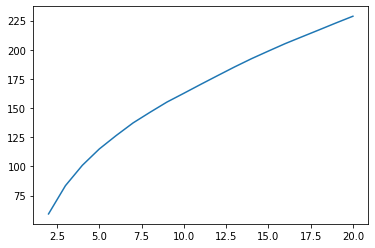

In [106]:
import matplotlib.pyplot as plt
plt.plot(range(2,21),error)
plt.show()

* We can see that the error is minimum when k=2. Therefore the suitable value of k in k-nearest neighbor is 2.

In [107]:
train_predicted=prediction(X_train)
test_predicted=prediction(X_test)

In [108]:
mae_train=metrics.mean_absolute_error(train_predicted,y_train)
mae_test=metrics.mean_absolute_error(test_predicted,y_test)

In [186]:
print("Mean Absolute Error for train set is {}".format(mae_train))
print("Mean Absolute Error for test set is {}".format(mae_test))

Mean Absolute Error for train set is 59.32416264985787
Mean Absolute Error for test set is 122.49199110122358


# Model Fitting Using sklearn:

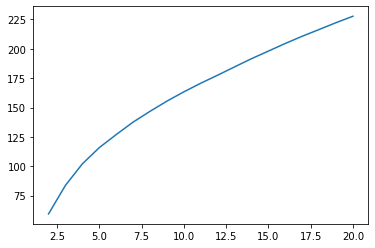

In [184]:
error=[]
for i in range(2,21):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_train)
    error.append(metrics.mean_absolute_error(pred,y_train))
plt.plot(range(2,21),error)
plt.show()

* Appropriate value of k is 2

In [185]:
model=KNeighborsRegressor(n_neighbors=2)
model.fit(X_train,y_train)
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)
print("Mean Absolute Error for train set is {}".format(metrics.mean_absolute_error(pred_train,y_train)))
print("Mean Absolute Error for test set is {}".format(metrics.mean_absolute_error(pred_test,y_test)))

Mean Absolute Error for train set is 59.399851687059694
Mean Absolute Error for test set is 123.72143121987393


# Final Conclusion:

Mean absolute error for both the models fitted using sklearn module and user defined function is almost same.